<a href="https://colab.research.google.com/github/Jaydenzk/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

# Load Boston housing dataset
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import normalize

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

57344/57026 [==============================] - 0s 0us/step
(404, 13) (404,) (102, 13) (102,)


In [0]:
# Normalzie the data
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [3]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

np.random.seed(812)

model = Sequential()

# Input Layer
model.add(Dense(16, input_dim=13, activation='relu'))

# Hidden Layer
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='linear'))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Hyper parameter
batch_size = 32
epochs = 1000

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=0)
# validation_split - reserve some data from dataset
# verbose shows the print statements
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 91us/sample - loss: 30.7300 - mean_squared_error: 30.7300
mean_squared_error: 30.729955673217773


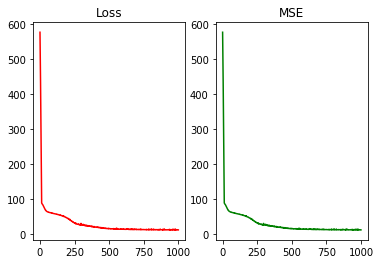

In [6]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['loss'], color = 'r')
ax1.set_title("Loss")
ax2.plot(history.history['mean_squared_error'], color = 'g')
ax2.set_title("MSE");

In [7]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate Model
lr_model = LinearRegression()

# Fit model
lr_model.fit(x_train, y_train)

# Predict
y_pred = lr_model.predict(x_test)

# Accuracy
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 18.165510493496484


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [16]:
##### Your Code Here #####

# Load bonston housing dataset
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
# Hyper Parameters
batch_size = 32
num_classes = 10
epochs = 100

In [0]:
# Reshape the data (28*28 = 784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# X Variable Types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# one-hot encode category labels for softmax
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

np.random.seed(812)

model = Sequential()

# Input Layer
model.add(Dense(16, input_dim=784, kernel_initializer='normal', activation='relu'))

# Hidden Layer
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))

# Output Layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=1)
# validation_split - reserve some data from dataset
# verbose shows the print statements
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 56us/sample - loss: 1.2937 - acc: 0.4442 - val_loss: 0.9970 - val_acc: 0.5760
Epoch 2/100
54000/54000 [==============================] - 3s 54us/sample - loss: 0.9357 - acc: 0.6129 - val_loss: 0.8565 - val_acc: 0.6613
Epoch 3/100
54000/54000 [==============================] - 3s 55us/sample - loss: 0.8661 - acc: 0.6530 - val_loss: 0.8606 - val_acc: 0.6700
Epoch 4/100
54000/54000 [==============================] - 3s 54us/sample - loss: 0.7938 - acc: 0.6978 - val_loss: 0.7635 - val_acc: 0.7190
Epoch 5/100
54000/54000 [==============================] - 3s 53us/sample - loss: 0.7630 - acc: 0.7065 - val_loss: 0.7082 - val_acc: 0.7332
Epoch 6/100
54000/54000 [==============================] - 3s 53us/sample - loss: 0.7653 - acc: 0.7117 - val_loss: 0.7212 - val_acc: 0.7427
Epoch 7/100
54000/54000 [==============================] - 3s 53us/sample - loss: 0.7424 - acc: 0.7139 - val_lo

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.